In [ ]:
#running knn gridsearch on a separate notebook because the model_refine notebook was still running and I am inpatient

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import LinearSVR
from warnings import filterwarnings

In [2]:
all_drugs = pd.read_csv('./data/all_drugs.csv')
all_drugs.head()

C:\Users\12155\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,key_0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,...,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name,dosage_form,route
0,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,204320,2,NaN,"May 30, 2017",No,No,DISCN,AJANTA PHARMA LTD,"TABLET, ORALLY DISINTEGRATING",ORAL
1,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,91265,2,AB,"Oct 24, 2011",No,No,RX,APOTEX INC,"TABLET, ORALLY DISINTEGRATING",ORAL
2,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,203708,2,AB,"May 15, 2014",No,No,RX,AUROBINDO PHARMA LTD,"TABLET, ORALLY DISINTEGRATING",ORAL
3,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,77243,2,AB,"Jan 30, 2012",No,No,RX,BARR LABORATORIES INC,"TABLET, ORALLY DISINTEGRATING",ORAL
4,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,76534,2,AB,"Oct 24, 2011",No,No,RX,DR REDDYS LABORATORIES LTD,"TABLET, ORALLY DISINTEGRATING",ORAL


In [4]:
all_drugs.drop(index=125625, inplace=True)

In [5]:
all_drugs.drop(columns=['Corresponding_Generic_Drug_Effective_Date', 'Unnamed: 0', 'DF;Route'], inplace=True) #remove unneeded columns
features =  all_drugs[['NDC Description','Pharmacy_Type_Indicator', 'Classification_for_Rate_Setting', 'dosage_form', 'route', #specify columns I want to use
           'Ingredient', 'Type']].copy()
feature_dummies = pd.get_dummies(features, columns = ['NDC Description','Pharmacy_Type_Indicator', 'Classification_for_Rate_Setting', 'dosage_form', 'route',
           'Ingredient', 'Type'], drop_first=True) #get dummies
X = feature_dummies
y = all_drugs['NADAC_Per_Unit']

In [6]:
sc = StandardScaler() #scale data
X_sc = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=17)

In [7]:
knn = KNeighborsRegressor(n_neighbors = 9, weights = 'distance' )
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='distance')

In [8]:
knn.score(X_train, y_train)

0.9236967965505535

In [9]:
knn.score(X_test, y_test)

0.8930206881385168

In [12]:
knn_preds = knn.predict(X_test)

In [14]:
from sklearn import metrics
metrics.mean_squared_error(y_test, knn_preds, squared=False)

4.249708026142643

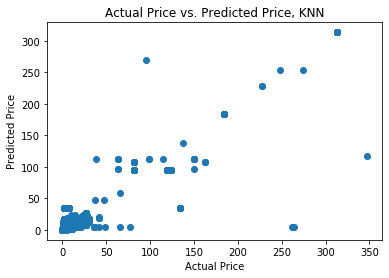

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test, knn_preds)
plt.title('Actual Price vs. Predicted Price, KNN')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');